# Pandas and Sklearn

*Vsechny zde probirane balicky jsou velmi obsahle, proto zde ukazeme jen nekolik zakladnich vlastnosti a metod prace s nimi. Jejich hlubsi studium je vzdy zavisle na potrebach uživatele.*

**Real usecase:** Podívejme se na data o cereáliích a pokusme se predikovat jak budou hodnoceny pouze pomocí jejich složení.

In [2]:
import pandas as pd                                   # excel on steroids

from sklearn.linear_model import LinearRegression     # linear regression implemented in sklearn
from sklearn.model_selection import train_test_split  # split data to train and test set

import matplotlib.pyplot as plt                       # package for making nice graphs
from matplotlib.style import use                      # only for nicer graphs
use('ggplot')                                         # only for nicer graphs

Načteme data z .csv souboru. Jelikož naše data užívají rozdílný oddělovač sloupců než pandas defalutně očekává, musíme specifikovat jeho skutečný tvar. Obdobně pro řádky užité jako hlavička dat.

In [3]:
# filepath_or_buffer: cesta k souboru s daty
# delimiter:          znak uzity k oddeleni sloupcu
# header:             radky slouzici jako hlavicka (nazvy sloupcu)
df = pd.read_csv(filepath_or_buffer='./data/cereals.csv', delimiter=';', header=[0,1])

df.head(5)  # vypise prvnich pet radku

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Snažíme odhadnout hodnocení ze složení cereálií, zajímá nás, jestli skutečně složení koreluje s hodnocením. Vykreslíme tedy graf závislosti hodnocení na jedné hodnotě charakterizující složení.

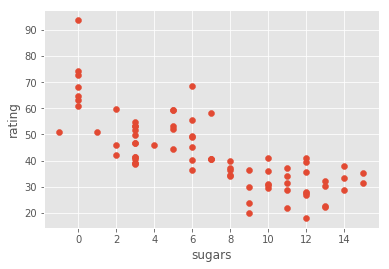

In [4]:
plt.scatter(df['sugars'], df['rating'])
plt.xlabel("sugars")
plt.ylabel("rating")
plt.show()

Samozřejmě se podíváme na všechny hodnoty, které užijeme pro predikci.

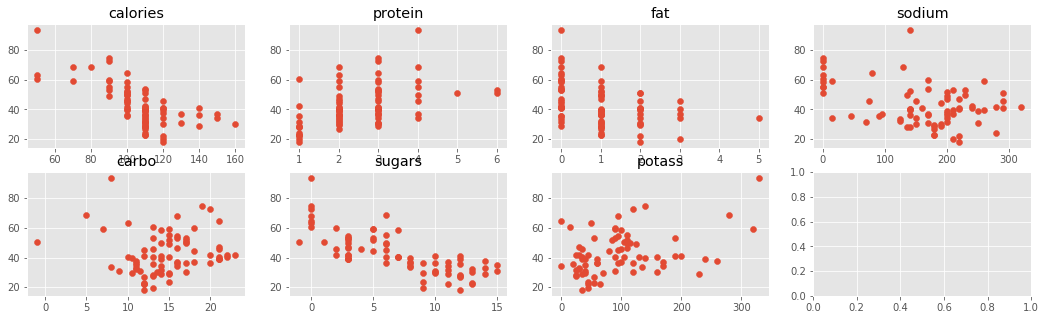

In [6]:
f, axarr = plt.subplots(2, 4, figsize=(18, 5))  # definujeme zakladni mrizku pro kreslení grafů

axarr[0, 0].scatter(df['calories'], df['rating'])  # vykreslime jeden z grafu
axarr[0, 0].set_title('calories')                  # napiseme nadpis

axarr[0, 1].scatter(df['protein'], df['rating'])
axarr[0, 1].set_title('protein')

axarr[0, 2].scatter(df['fat'], df['rating'])
axarr[0, 2].set_title('fat')

axarr[0, 3].scatter(df['sodium'], df['rating'])
axarr[0, 3].set_title('sodium')

axarr[1, 0].scatter(df['carbo'], df['rating'])
axarr[1, 0].set_title('carbo')

axarr[1, 1].scatter(df['sugars'], df['rating'])
axarr[1, 1].set_title('sugars')

axarr[1, 2].scatter(df['potass'], df['rating'])
axarr[1, 2].set_title('potass')

plt.show()

In [7]:
X = df[['calories', 'protein', 'fat', 'sodium', 'carbo', 'sugars', 'potass']].values  # extrahuje features z tabulky
y = df['rating'].values                                                               # extrahuje hodnoty, ktere se snazime odhadnout

# rozdeli X a y na treninkovou a testovaci cast
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

In [9]:
myLinearRegression = LinearRegression()  # definuje model na defalutni model
myLinearRegression.fit(X=X_train, y=y_train)  # natrenuje model na treninkovych datech

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print("-------------Validation on the test set.-------------")  # jen pro hezci zapis na obrazovku

det_coef = myLinearRegression.score(X=X_test, y=y_test)  # spocita R2koeficient
print('Coefficient of determination: {:.3f}'.format(det_coef))

print("-"*53)  # jen pro zapis vypis na obrazovku

y_test_pred = myLinearRegression.predict(X_test)  # udela predikci pro testovaci data
for i in range(y_test.shape[0]):
    print('Target: {:.3f}, Prediction: {:.3f}, Difference: {:.3f}'.format(float(y_test[i]),
                                                                          float(y_test_pred[i]),
                                                                          abs(float(y_test[i]) - float(y_test_pred[i]))))
print("-"*53)  # jen pro hezci zapis na obrazovku

-------------Validation on the test set.-------------
Coefficient of determination: 0.941
-----------------------------------------------------
Target: 60.756, Prediction: 65.342, Difference: 4.586
Target: 31.072, Prediction: 32.307, Difference: 1.235
Target: 39.703, Prediction: 43.448, Difference: 3.745
Target: 35.783, Prediction: 31.591, Difference: 4.192
Target: 45.328, Prediction: 46.251, Difference: 0.923
Target: 19.824, Prediction: 20.332, Difference: 0.509
Target: 40.917, Prediction: 39.863, Difference: 1.054
Target: 41.445, Prediction: 41.269, Difference: 0.176
-----------------------------------------------------
